In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('spam.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [6]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### 1. cleaning data
missing values imputation

In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# cheaking for duplicate 
df.duplicated().sum()

415

In [11]:
# remove duplicate values
df=df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5157, 2)

## 2.Exploratory data analysis

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

0    4516
1     641
Name: target, dtype: int64

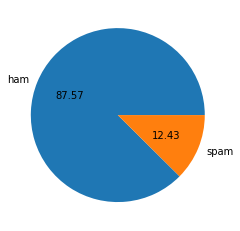

In [16]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [17]:
# data is imbalaced

In [18]:
# num of character for each message
df['num_char']=df['text'].apply(len)

In [19]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# number of word
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df['num_sentances']=df['text'].apply(lambda z:len(nltk.sent_tokenize(z)))

In [23]:
df.head()

,target,text,num_char,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_char','num_words','num_sentances']].describe()

,num_char,num_words,num_sentances
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [25]:
# ham messages
df[df['target']==0][['num_char','num_words','num_sentances']].describe()

,num_char,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
# spam messages
df[df['target']==1][['num_char','num_words','num_sentances']].describe()

,num_char,num_words,num_sentances
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_words', ylabel='Count'>

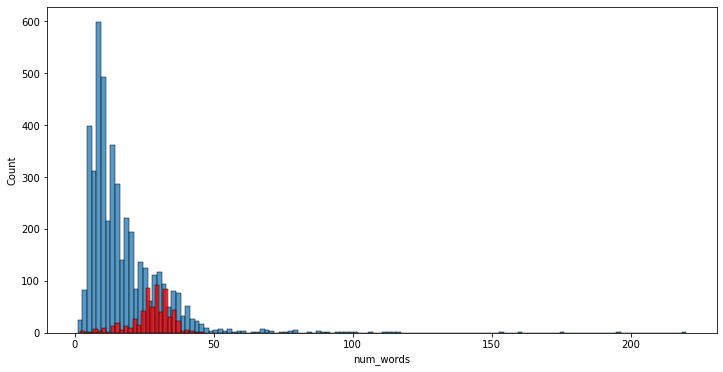

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_char', ylabel='Count'>

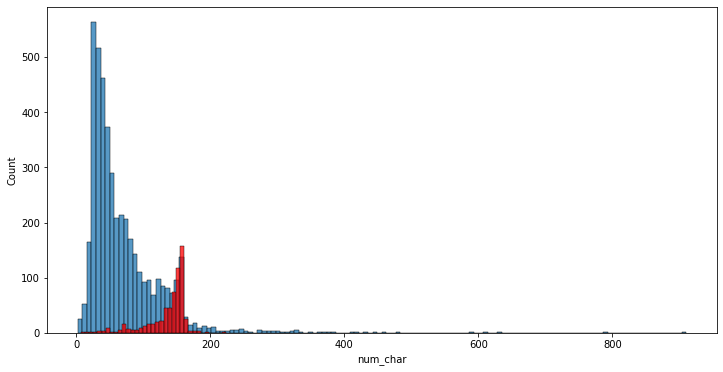

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

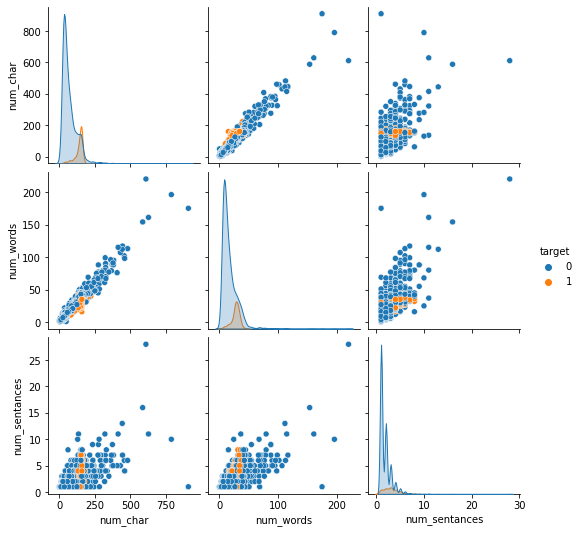

In [29]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

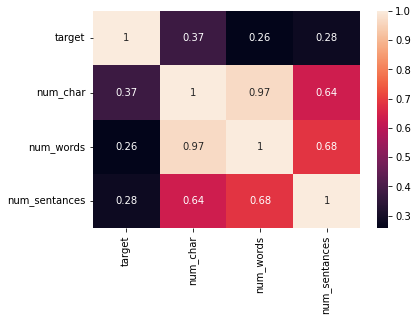

In [30]:
sns.heatmap(df.corr(),annot=True)

## 3..data preprocessing 
     .lower_case
     .tokenization
     .removing special charaters
     .removing stopwords and punctuation
     .stemming


In [31]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [32]:
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
        
    for i in text:
        y.append(ps.stem(i))
            
            
    return ' '.join(y)

In [33]:
text_transform(' Free entry love in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18s')

'free entri love 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate cs appli 08452810075over18'

In [34]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [35]:
df['transform_text']=df['text'].apply(text_transform)

In [36]:
df.head()

,target,text,num_char,num_words,num_sentances,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
# check most common words used in spam messages

spam_corpus=[]
for sms in df[df['target']==1]['transform_text'].tolist():
    for word in sms.split():
        spam_corpus.append(word)
        

In [38]:
len(spam_corpus)

9781

In [39]:
# most commom 30 words

from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


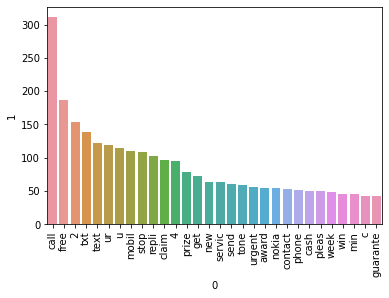

In [40]:
# barplot of most common words

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
# cheack most common words used in ham messages

ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
        

In [42]:
len(ham_corpus)

35930

C:\Users\UUUU\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


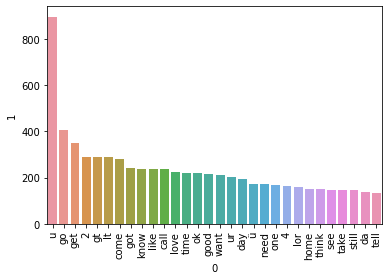

In [43]:
# most common 30 words use in ham messages

from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

##### covert text data in to numerical data 

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfdv=TfidfVectorizer(max_features=3000)

In [45]:
X=tfdv.fit_transform(df['transform_text']).toarray()

In [46]:
X.shape

(5157, 3000)

In [47]:
y=df['target'].values

In [48]:
y

array([0, 0, 1, ..., 0, 0, 0])

#### split data for testing and training

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

#### apply machine learning models on data

In [50]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

# import metrics for accuracy score,confusion metrics and precision_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# create object for models
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [51]:
# GaussianNB model

gnb.fit(X_train,y_train)
ypred1=gnb.predict(X_test)
print('accuracy score : \n',accuracy_score(y_test,ypred1))
print()
print('confusion metrics : \n',confusion_matrix(y_test,ypred1))
print()
print('precision score :\n',precision_score(y_test,ypred1))

accuracy score : 
 0.8662790697674418

confusion metrics : 
 [[784 121]
 [ 17 110]]

precision score :
 0.47619047619047616


In [52]:
# MultinomialNB model

mnb.fit(X_train,y_train)
ypred2=mnb.predict(X_test)
print('accuracy score : \n',accuracy_score(y_test,ypred2))
print()
print('confusion metrics : \n',confusion_matrix(y_test,ypred2))
print()
print('precision score :\n',precision_score(y_test,ypred2))

accuracy score : 
 0.9709302325581395

confusion metrics : 
 [[905   0]
 [ 30  97]]

precision score :
 1.0


In [53]:
# BernoulliNB model

bnb.fit(X_train,y_train)
ypred3=bnb.predict(X_test)
print('accuracy score : \n',accuracy_score(y_test,ypred3))
print()
print('confusion metrics : \n',confusion_matrix(y_test,ypred3))
print()
print('precision score :\n',precision_score(y_test,ypred3))

accuracy score : 
 0.9835271317829457

confusion metrics : 
 [[903   2]
 [ 15 112]]

precision score :
 0.9824561403508771


In [54]:
# best accuracy and precision -->'TfidfVectorizer' ---> MultinomialNB

### train more machine learning models on text data

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

###### creating object for models

In [56]:
lr=LogisticRegression(solver='liblinear',penalty='l1')
sv=SVC(kernel='sigmoid',gamma=1.0)
mn=MultinomialNB()
dc=DecisionTreeClassifier(max_depth=5)
kn=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gb=GradientBoostingClassifier(n_estimators=50,random_state=2)
xb=XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs={'LogisticRegression':lr,
      'SVC':sv,
      'MultinomialNB':mn,
      'DecisionTreeClassifier':dc,
      'KNeighborsClassifier':kn,
      'RandomForestClassifier':rfc,
      'AdaBoostClassifier':abc,
      'BaggingClassifier':bc,
      'ExtraTreesClassifier':etc,
      'GradientBoostingClassifier':gb,
      'XGBClassifier':xb
      
    
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    ypred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,ypred)
    precision=precision_score(y_test,ypred)
    return accuracy,precision

In [59]:
# train_classifier(sv,X_train,y_train,X_test,y_test)

In [60]:
accur_score=[]
prec_score=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train, y_train, X_test, y_test)
    
    print('name -',name)
    print('accuracy -',current_accuracy)
    print('precision -',current_precision)
    
    accur_score.append(current_accuracy)
    prec_score.append(current_precision)
    

name - LogisticRegression
accuracy - 0.9583333333333334
precision - 0.9375
name - SVC
accuracy - 0.9757751937984496
precision - 0.9811320754716981
name - MultinomialNB
accuracy - 0.9709302325581395
precision - 1.0
name - DecisionTreeClassifier
accuracy - 0.935077519379845
precision - 0.8125
name - KNeighborsClassifier
accuracy - 0.9127906976744186
precision - 1.0
name - RandomForestClassifier
accuracy - 0.9738372093023255
precision - 1.0
name - AdaBoostClassifier
accuracy - 0.9660852713178295
precision - 0.9423076923076923
name - BaggingClassifier
accuracy - 0.9612403100775194
precision - 0.8918918918918919
name - ExtraTreesClassifier
accuracy - 0.9777131782945736
precision - 0.9905660377358491
name - GradientBoostingClassifier
accuracy - 0.9554263565891473
precision - 0.9764705882352941
name - XGBClassifier
accuracy - 0.9680232558139535
precision - 0.9607843137254902


In [61]:
import pickle
pickle.dump(tfdv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [62]:
accur_score

[0.9583333333333334,
 0.9757751937984496,
 0.9709302325581395,
 0.935077519379845,
 0.9127906976744186,
 0.9738372093023255,
 0.9660852713178295,
 0.9612403100775194,
 0.9777131782945736,
 0.9554263565891473,
 0.9680232558139535]

In [63]:
prec_score

[0.9375,
 0.9811320754716981,
 1.0,
 0.8125,
 1.0,
 1.0,
 0.9423076923076923,
 0.8918918918918919,
 0.9905660377358491,
 0.9764705882352941,
 0.9607843137254902]